## LOGISTIC REGRESSION

### 1. Data Exploration:

a. Load the dataset and perform exploratory data analysis (EDA).

b. Examine the features, their types, and summary statistics.

c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships 
between features.

Analyze any patterns or correlations observed in the data.


In [1]:
import pandas as pd
data=pd.read_csv('diabetes.csv')
df=pd.DataFrame(data)

In [2]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [9]:
for col in df.columns:
    
    Q1=df[col].quantile(.25)
    Q3=df[col].quantile(.75)
    IQR=Q3-Q1
    
    upper=Q3+(1.5*IQR)
    lower=Q1-(1.5*IQR)
    
    outlier=df[(df[col]>upper)|(df[col]<lower)]
    
    print("\n\n",col)
    print('Upper',upper)
    print('Lower',lower)
    print('Outlier',len(outlier))



 Pregnancies
Upper 13.5
Lower -6.5
Outlier 4


 Glucose
Upper 202.125
Lower 37.125
Outlier 5


 BloodPressure
Upper 107.0
Lower 35.0
Outlier 45


 SkinThickness
Upper 80.0
Lower -48.0
Outlier 1


 Insulin
Upper 318.125
Lower -190.875
Outlier 34


 BMI
Upper 50.550000000000004
Lower 13.35
Outlier 19


 DiabetesPedigreeFunction
Upper 1.2
Lower -0.32999999999999996
Outlier 29


 Age
Upper 66.5
Lower -1.5
Outlier 9


 Outcome
Upper 2.5
Lower -1.5
Outlier 0


In [10]:
def outlier(df,col):
    
    q1=df[col].quantile(.25)
    q3=df[col].quantile(.75)
    iqr=q3-q1
    
    upper=q3+(1.5*iqr)
    lower=q1-(1.5*iqr)
    
    return upper,lower

def replace(df):
    
    df1=df.copy()
    df1=df1.astype(float)
    
    for col in df.columns:
        
        upper,lower=outlier(df,col)
        df1.loc[df1[col]>upper,col]=upper
        df1.loc[df1[col]<lower,col]=lower
        
    return df1

In [11]:
df1=replace(df)

for col in df.columns:
    
    q1=df1[col].quantile(.25)
    q3=df1[col].quantile(.75)
    iqr=q3-q1
    
    upper=q3+(1.5*iqr)
    lower=q1-(1.5*iqr)
    
    outliers=df1[(df1[col]>upper)|(df1[col]<lower)]
    print(f"{col} : {len(outliers)}")


Pregnancies : 0
Glucose : 0
BloodPressure : 0
SkinThickness : 0
Insulin : 0
BMI : 0
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 0


In [12]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [13]:
df['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

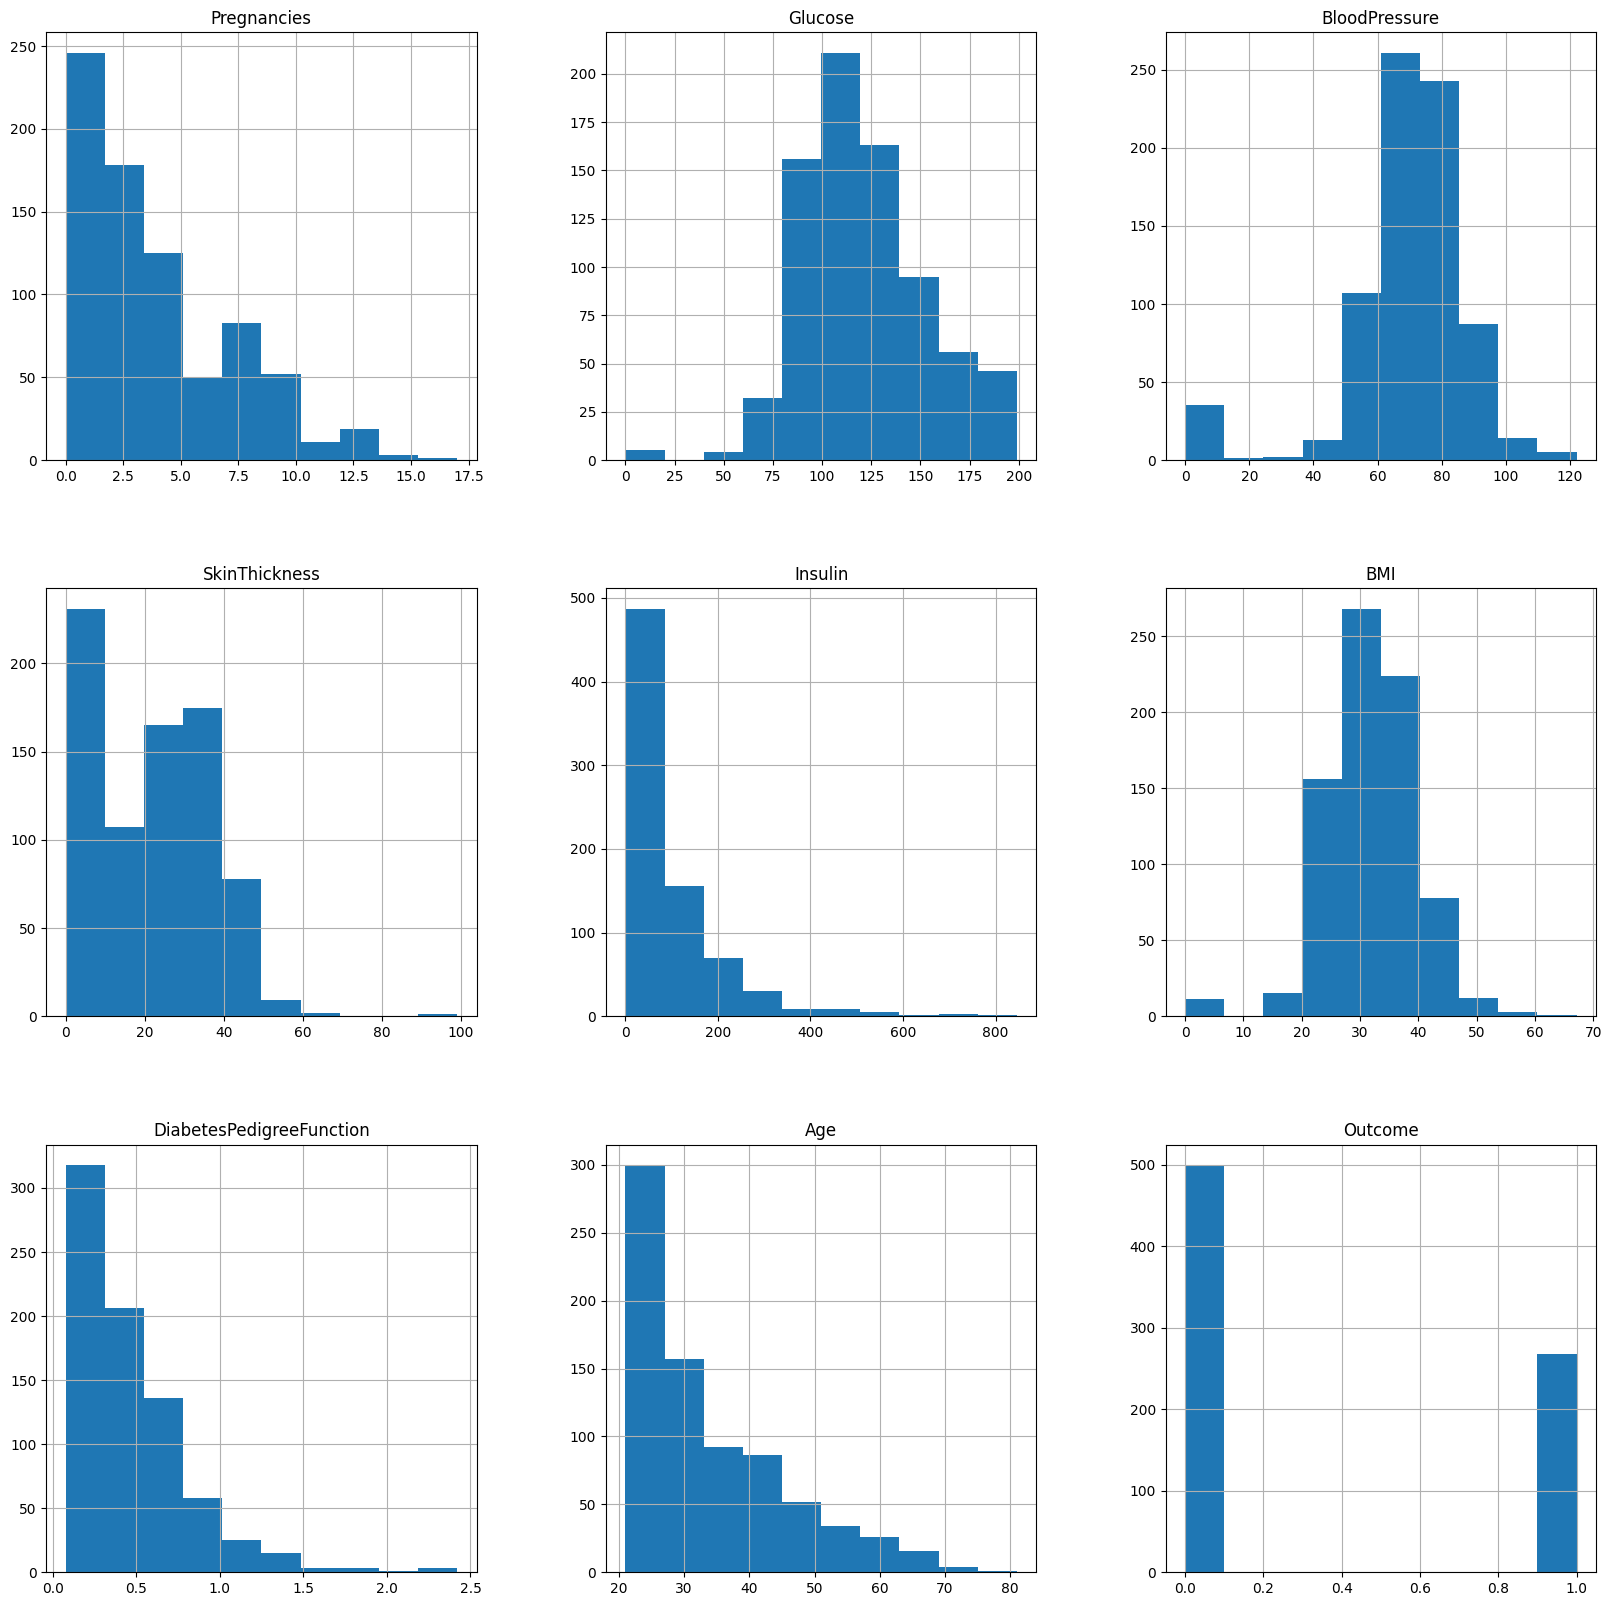

In [14]:
df.hist(figsize=(20,20))

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

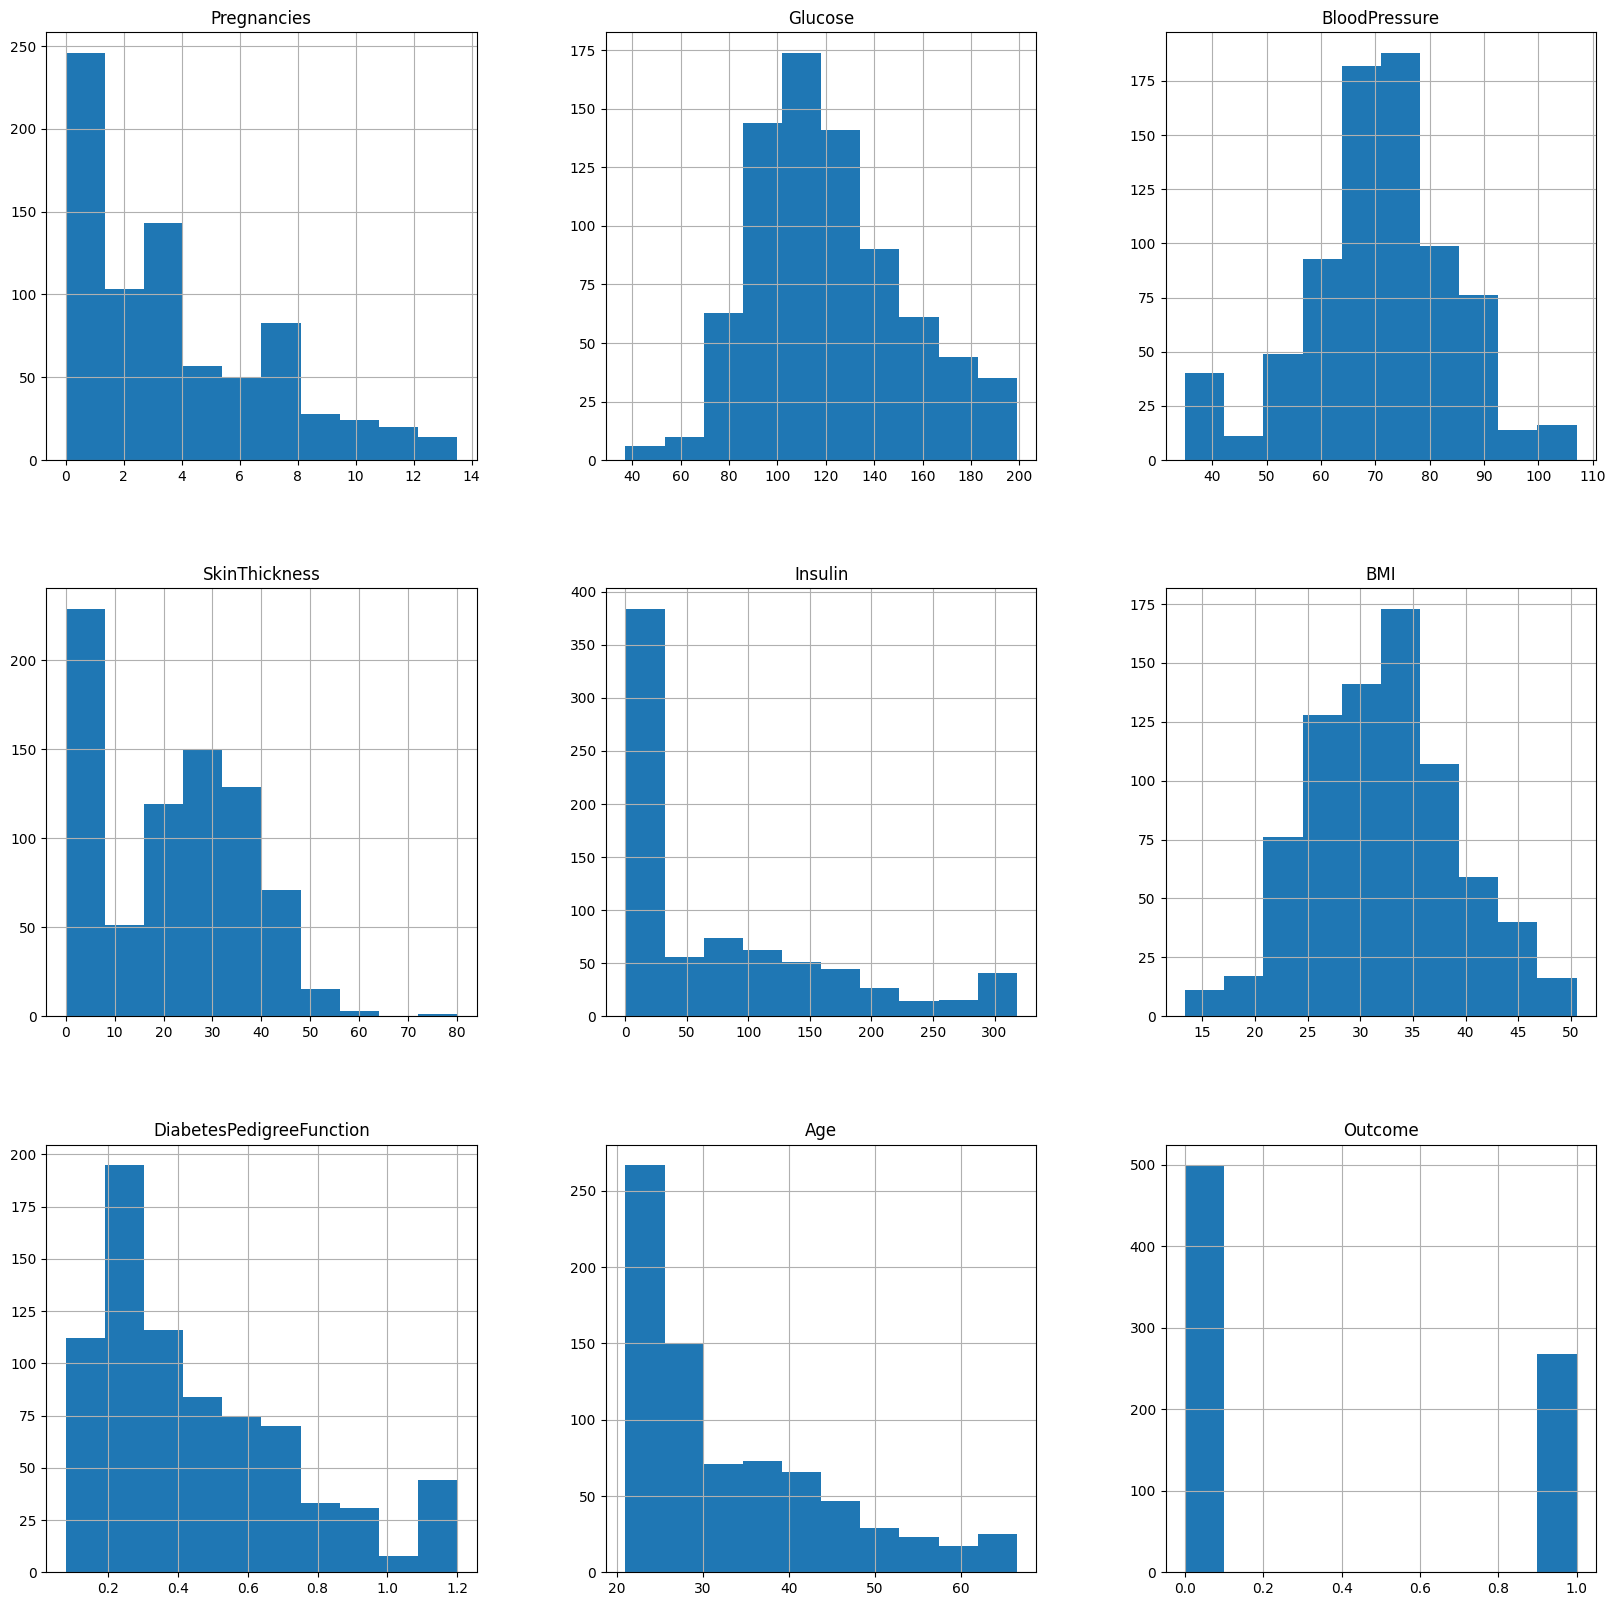

In [15]:
df1.hist(figsize=(20,20))

<Axes: >

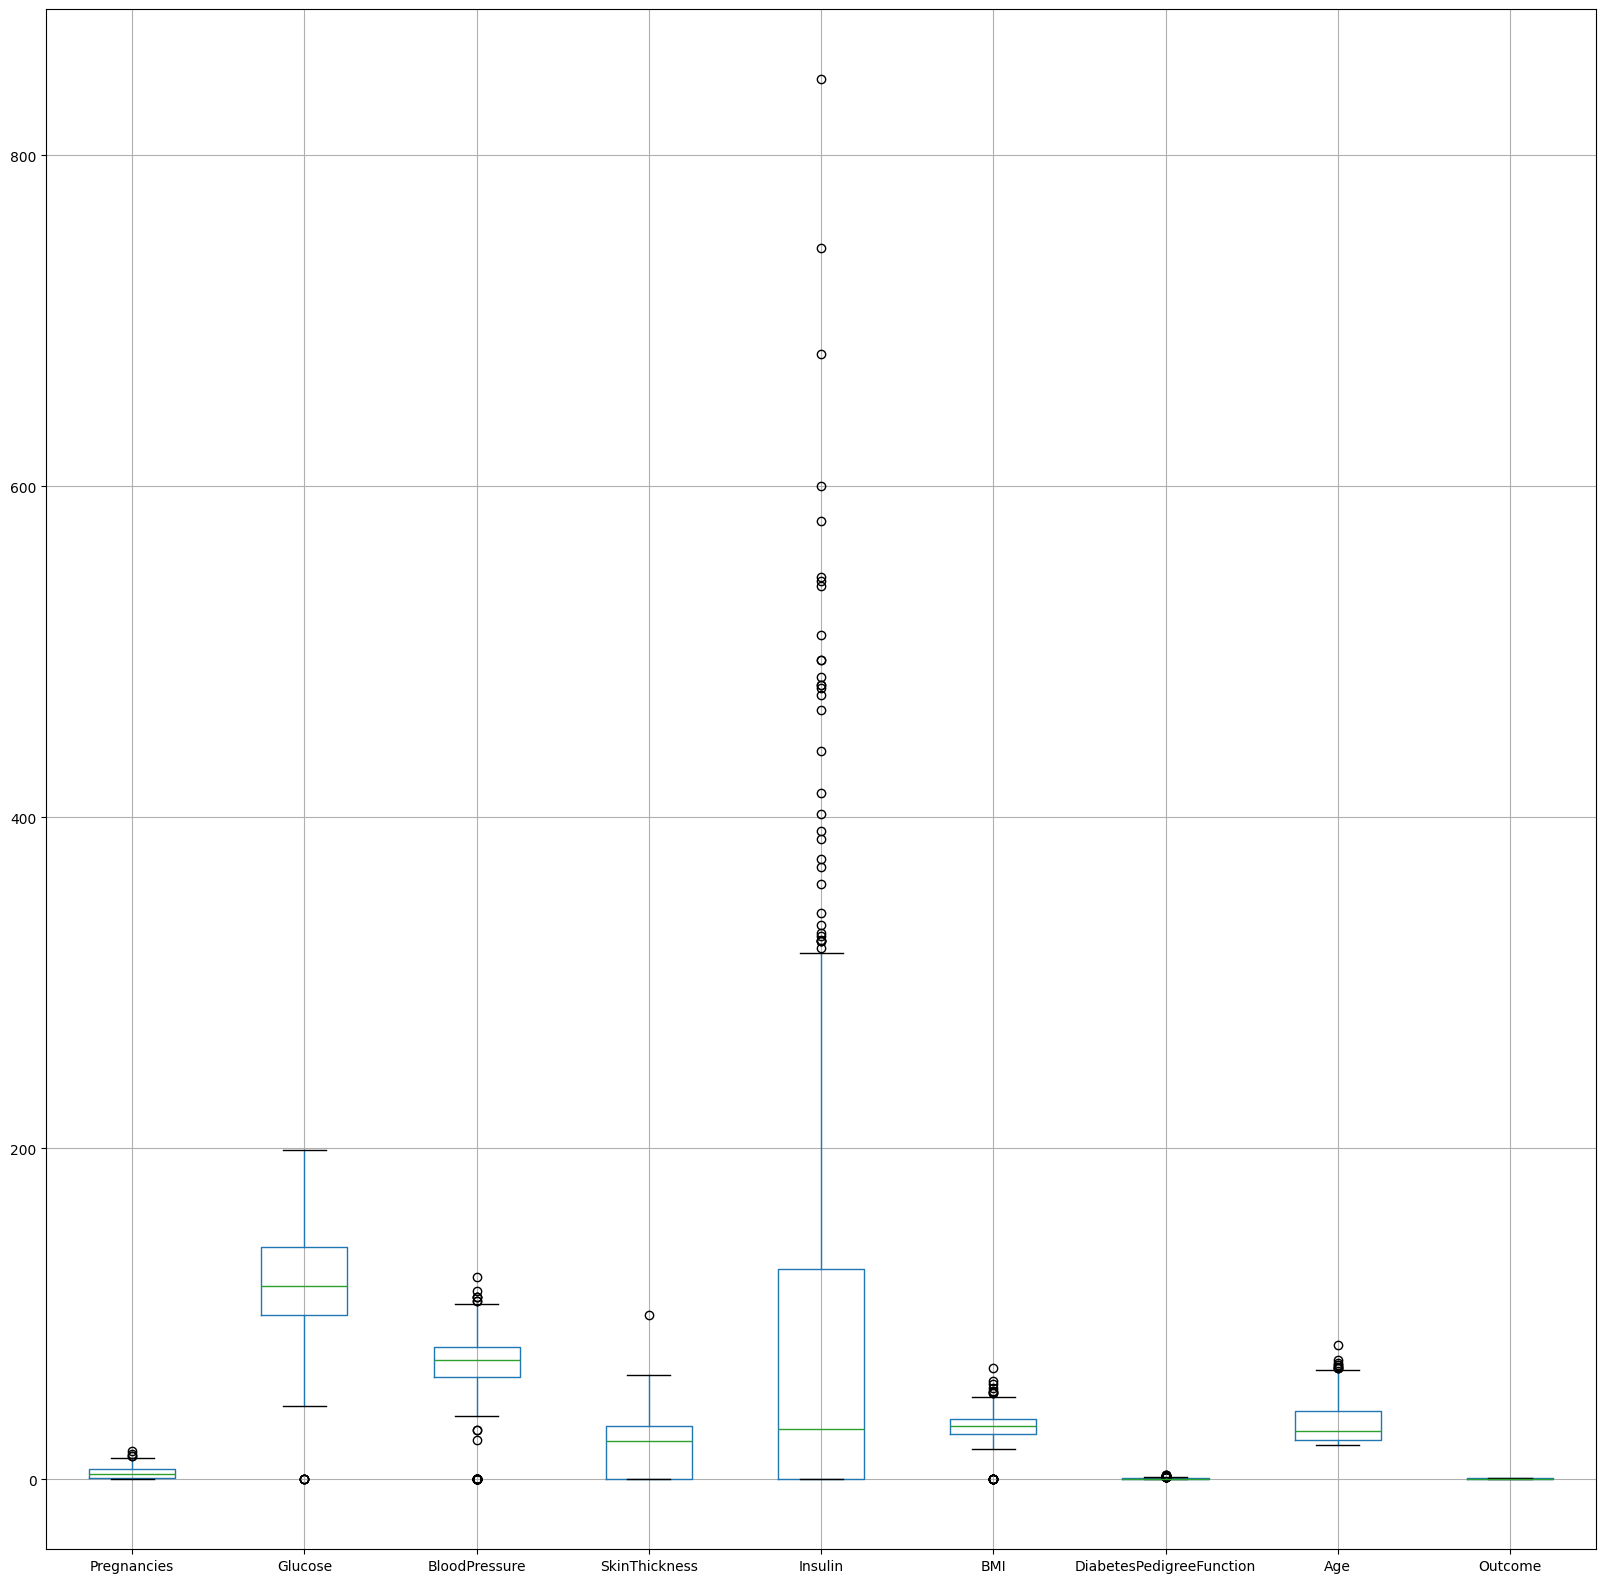

In [16]:
df.boxplot(figsize=(20,20))

<Axes: >

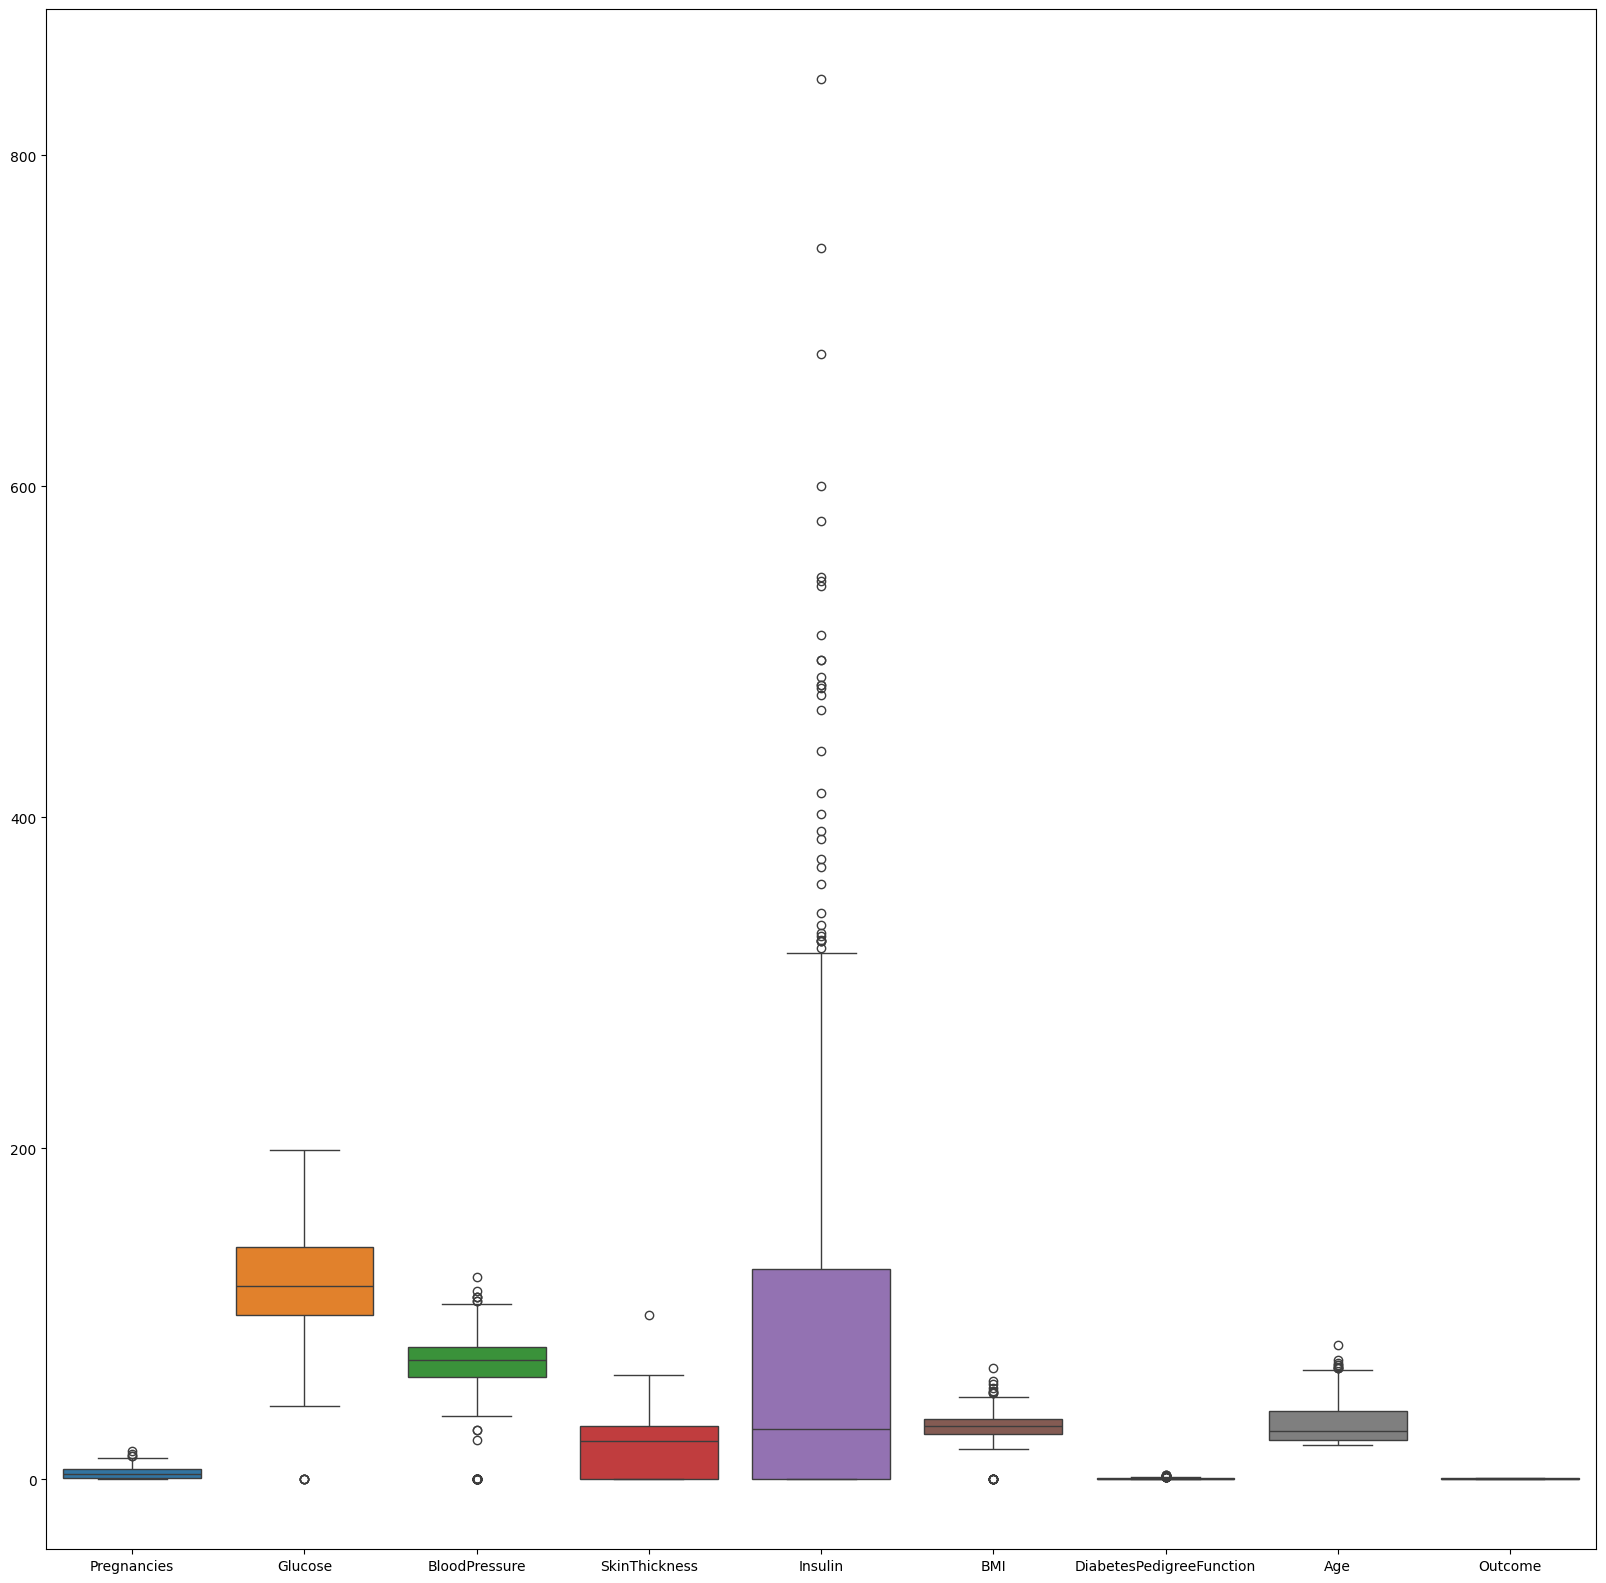

In [20]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.boxplot(df)

<Axes: >

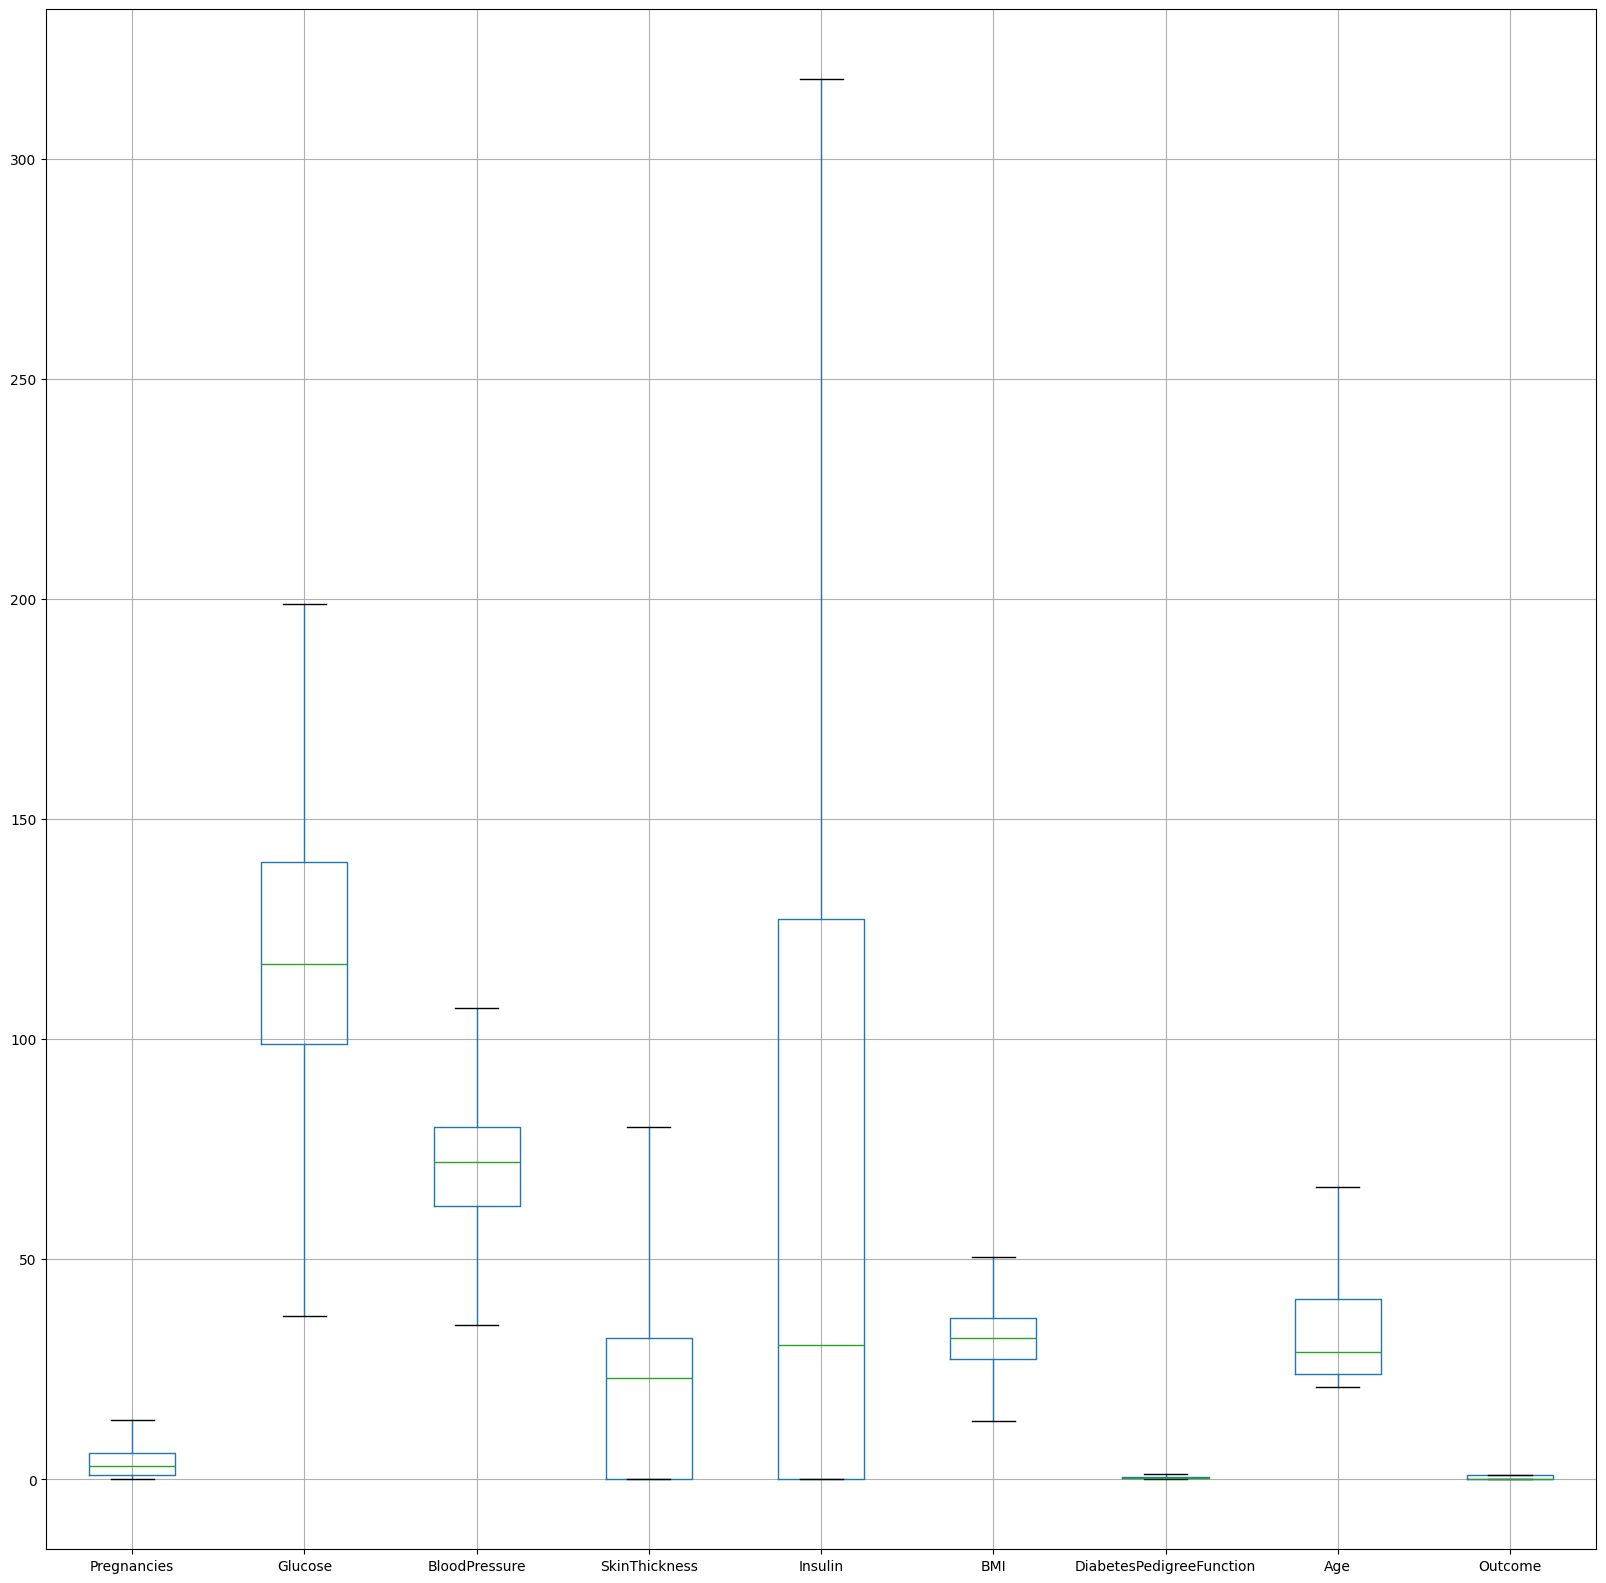

In [21]:
df1.boxplot(figsize=(20,20)) #In this dataframe the outliers are removed and we got clean boxplot without outliers

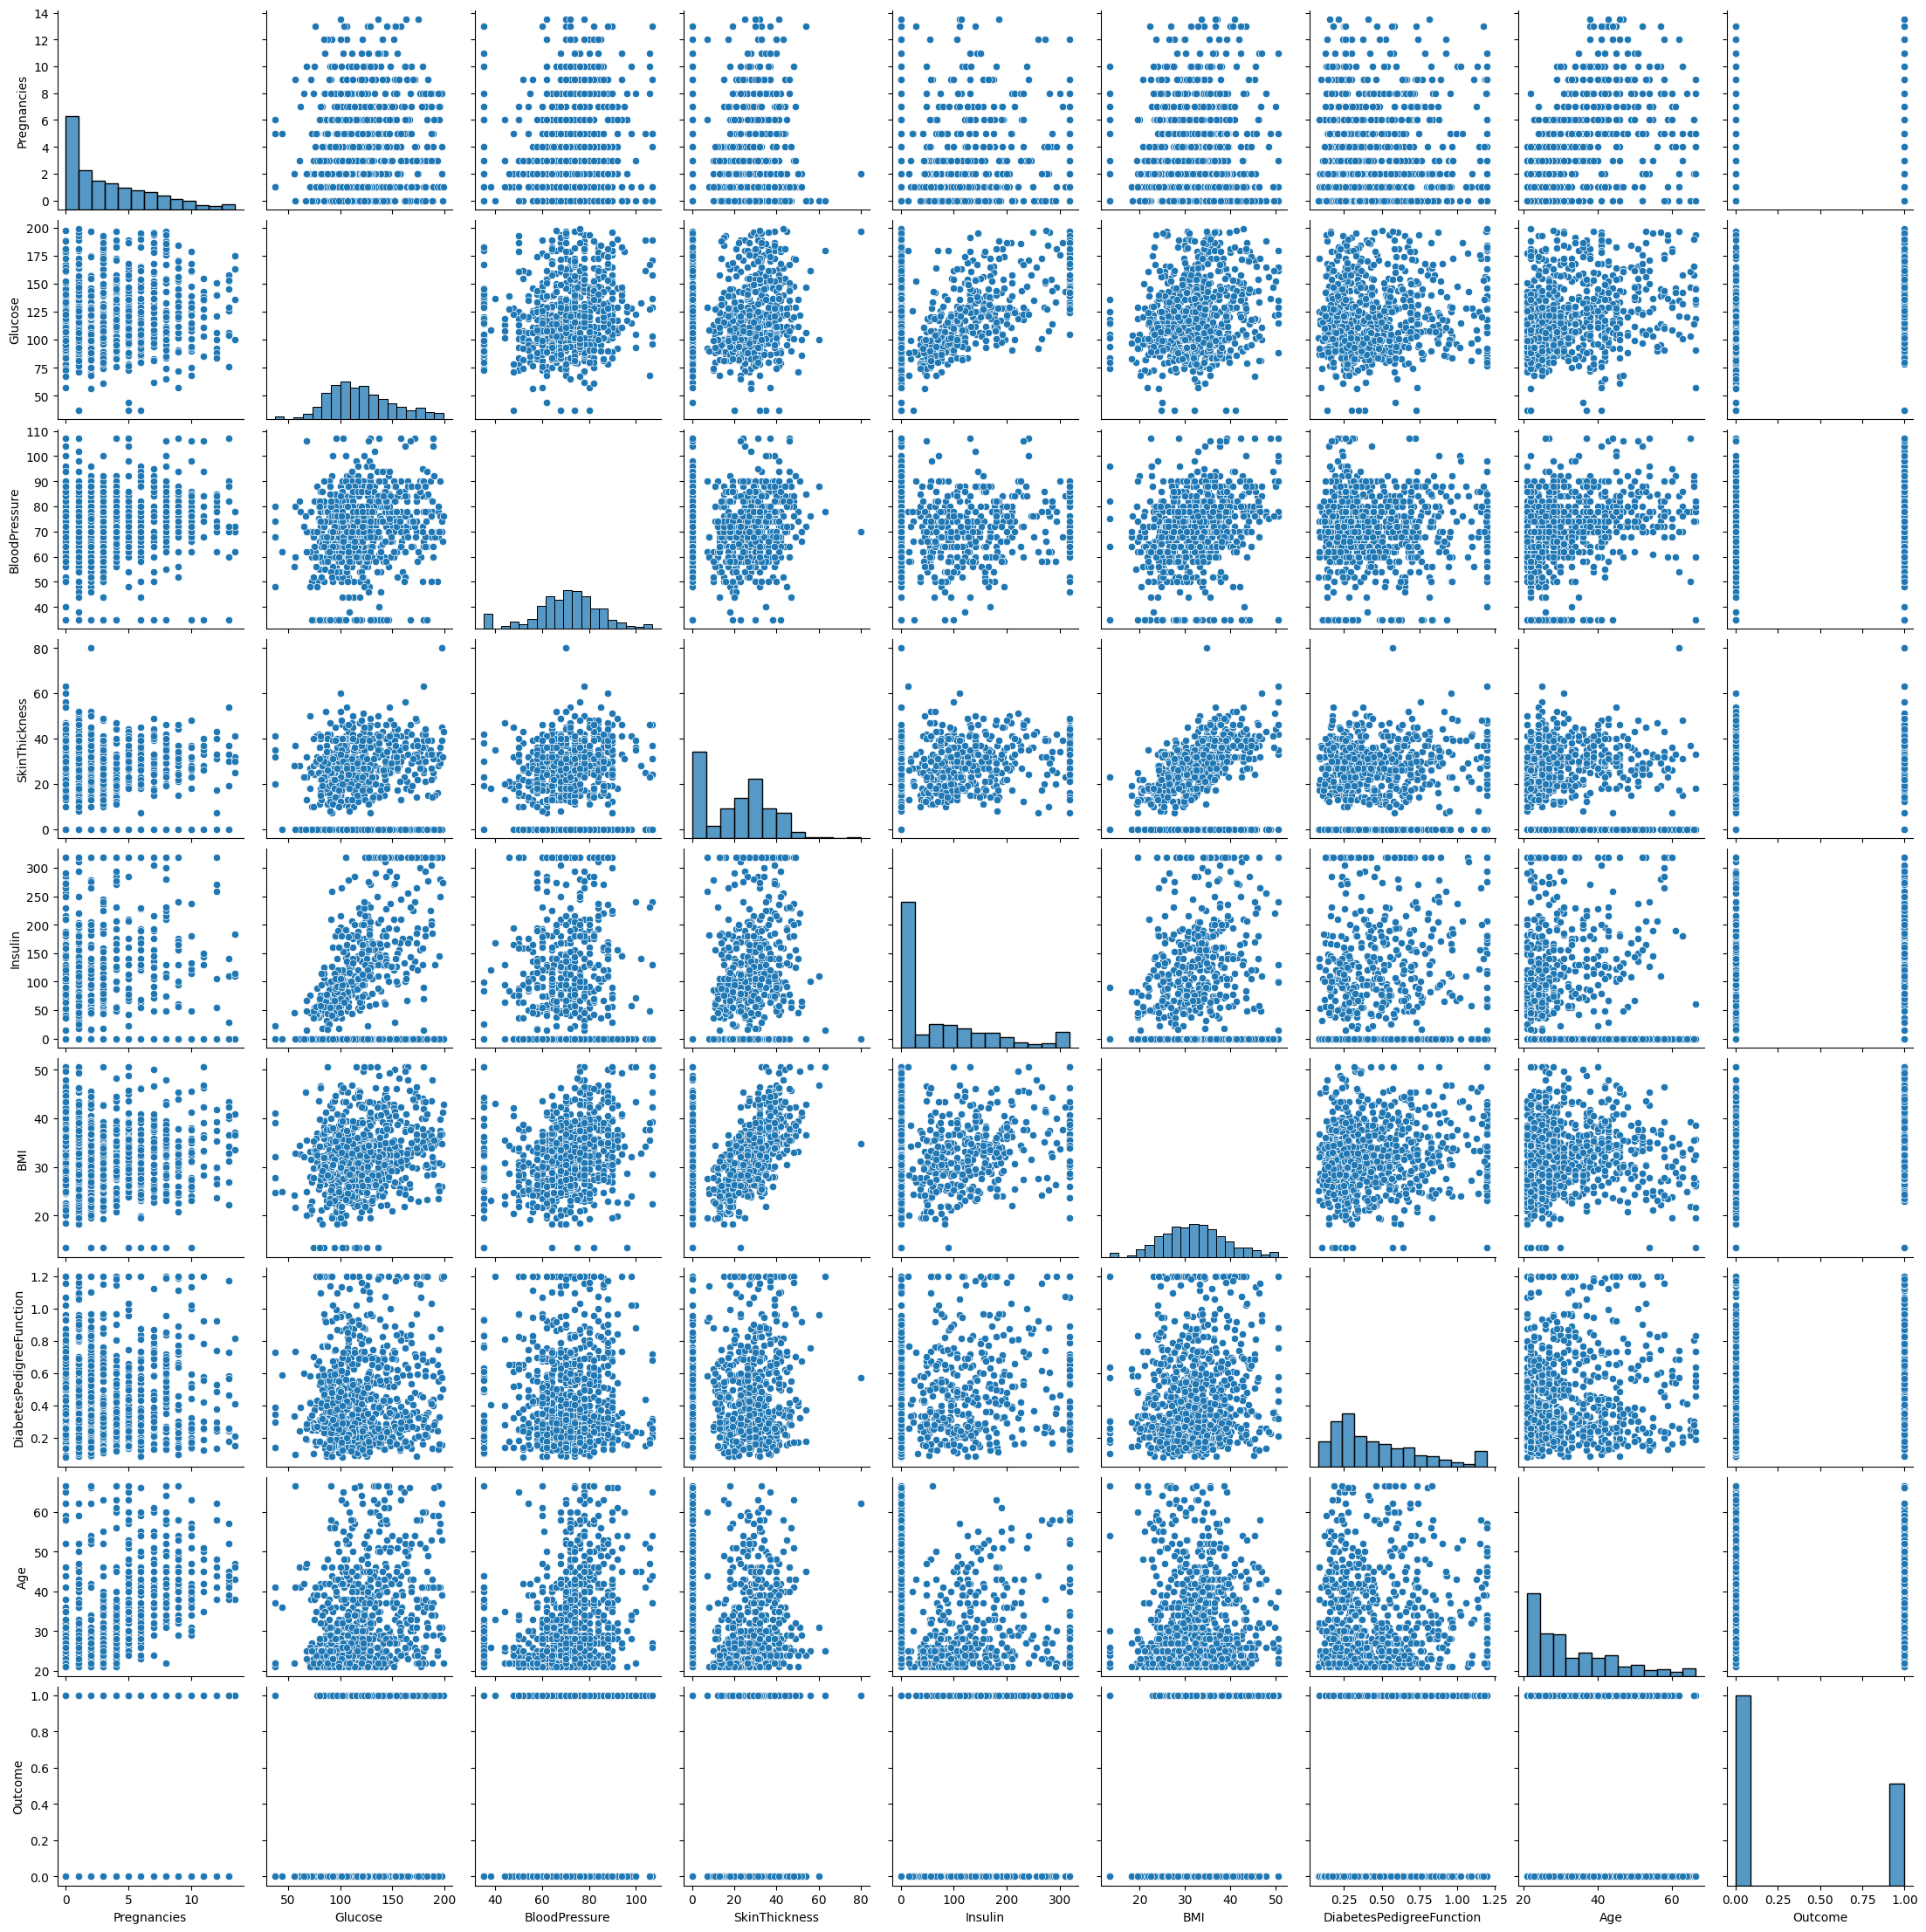

In [23]:
import seaborn as sns
sns.pairplot(df1)

<Axes: >

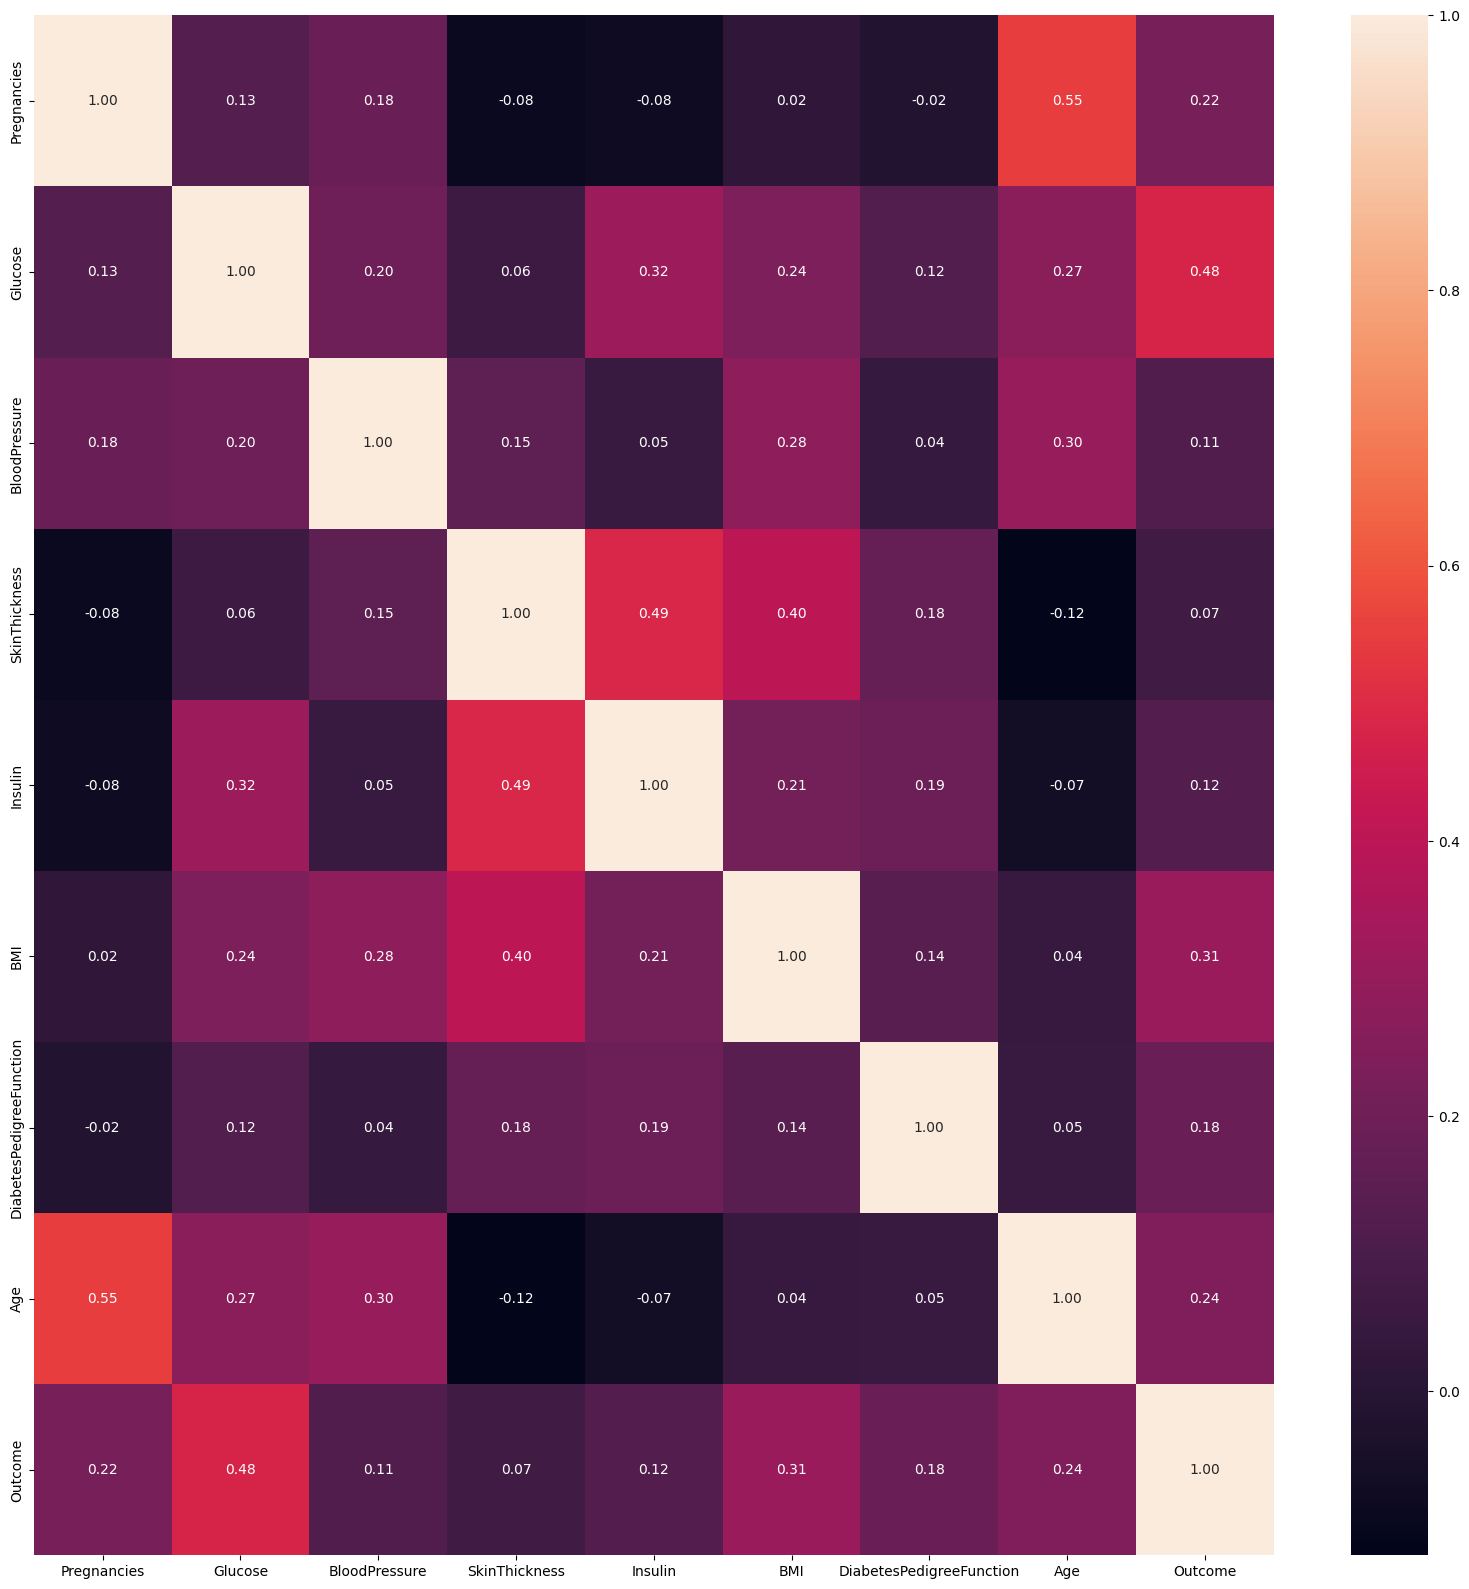

In [24]:
import matplotlib.pyplot as plt
corr=df1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,fmt='.2f')

### 2. Data Preprocessing:

a. Handle missing values (e.g., imputation).

b. Encode categorical variables.


In [25]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zero] = df[cols_with_zero].replace(0, pd.NA)

df.fillna(df.median(), inplace=True)
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [28]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", categorical_cols.tolist())


Categorical Columns:
 []


In [29]:
if len(categorical_cols) > 0:
    df = pd.get_dummies(df, drop_first=True)
    print("\nAfter One-Hot Encoding, new columns are:\n", df.columns.tolist())
else:
    print("\nNo categorical columns found — encoding not required.")



No categorical columns found — encoding not required.


There is no missing values hence no need of handling missing values here

In [26]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

There is no categorical data is present here so no need of encoding required

### 3. Model Building:

a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

b. Train the model using the training data.


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,roc_auc_score,roc_curve

In [43]:
x=df.drop(['Outcome'],axis=1)
y=df['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [45]:
print(x_train.shape)
print(y_train.shape)

(614, 8)
(614,)


In [46]:
print(x_test.shape)
print(y_test.shape)

(154, 8)
(154,)


In [47]:
total_rows=df.shape[0]
train_percentage=(x_train.shape[0]/total_rows)*100
test_percentage=(x_test.shape[0]/total_rows)*100
print('train Percentage',train_percentage)
print('test Percentage',test_percentage)

train Percentage 79.94791666666666
test Percentage 20.052083333333336


In [57]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred_proba=model.predict_proba(x_test)[:,1]

In [60]:
model.coef_

array([[ 0.06763885,  0.03733578, -0.01323948,  0.00770755, -0.00166818,
         0.101796  ,  0.55243412,  0.03460303]])

In [61]:
model.intercept_

array([-9.40403361])

### 4. Model Evaluation:

a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

Visualize the ROC curve.


In [58]:
print('f1_score',f1_score(y_test,y_pred))
print('roc_auc_score',roc_auc_score(y_test,y_pred_proba))


f1_score 0.6415094339622641
roc_auc_score 0.8211202938475666


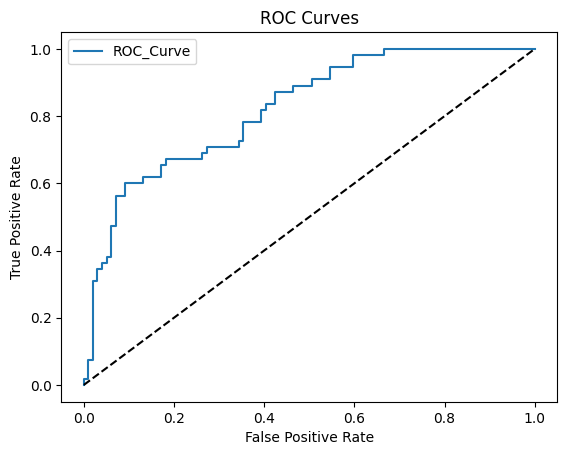

In [65]:
fpr,tpr,_=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr,label='ROC_Curve')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show() 
   

### 5. Interpretation:

a. Interpret the coefficients of the logistic regression model.

b. Discuss the significance of features in predicting the target variable (survival probability in this case).


In [73]:
coefficients=pd.DataFrame({'Feature':x.columns,
                           'Coefficient':model.coef_[0]}).sort_values(by="Coefficient",ascending=False)
print('Coefficients are: ')
print(coefficients)

Coefficients are: 
                    Feature  Coefficient
6  DiabetesPedigreeFunction     0.552434
5                       BMI     0.101796
0               Pregnancies     0.067639
1                   Glucose     0.037336
7                       Age     0.034603
3             SkinThickness     0.007708
4                   Insulin    -0.001668
2             BloodPressure    -0.013239


Positive coefficient: increases the probability of survival.

Negative coefficient: decreases the probability of survival.

Magnitude: shows the strength of influence on survival probability.

Here for the given dataset

Positive number : higher value increases chances of survival.

Negative number : higher value decreases chances of survival.

Age (-0.0276) : Older people have slightly lower chance of survival.

Blood Pressure (-0.0209) : Higher blood pressure slightly reduces survival chance.

Diabetes Pedigree Function (0.969) : Higher pedigree increases survival chance.

Other features like Glucose, BMI, Insulin : don’t have a strong effect.

(Only Age is clearly important (p-value < 0.05).

Blood Pressure is a little important (p ~ 0.075).

Other features don’t have a statistically significant effect in this model.)

In [74]:
import numpy as np
coefficients['Odds_Ratio'] = np.exp(coefficients['Coefficient'])
print("\n Interpretation (Odds Ratios)\n")
for idx, row in coefficients.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    odds_ratio = row['Odds_Ratio']
    direction = "increase" if coef > 0 else "decrease"
    print(f"- {feature}: coefficient = {coef:.3f}, odds ratio = {odds_ratio:.3f} --> {direction} the likelihood of survival\n")


 Interpretation (Odds Ratios)

- DiabetesPedigreeFunction: coefficient = 0.552, odds ratio = 1.737 --> increase the likelihood of survival

- BMI: coefficient = 0.102, odds ratio = 1.107 --> increase the likelihood of survival

- Pregnancies: coefficient = 0.068, odds ratio = 1.070 --> increase the likelihood of survival

- Glucose: coefficient = 0.037, odds ratio = 1.038 --> increase the likelihood of survival

- Age: coefficient = 0.035, odds ratio = 1.035 --> increase the likelihood of survival

- SkinThickness: coefficient = 0.008, odds ratio = 1.008 --> increase the likelihood of survival

- Insulin: coefficient = -0.002, odds ratio = 0.998 --> decrease the likelihood of survival

- BloodPressure: coefficient = -0.013, odds ratio = 0.987 --> decrease the likelihood of survival



In [75]:
coefficients['Impact'] = coefficients['Coefficient'].abs()
coefficients_sorted = coefficients.sort_values(by='Impact', ascending=False)
print("Feature Significance")
print("Features with strongest impact on survival probability:")
print(coefficients_sorted[['Feature', 'Coefficient', 'Odds_Ratio']])

Feature Significance
Features with strongest impact on survival probability:
                    Feature  Coefficient  Odds_Ratio
6  DiabetesPedigreeFunction     0.552434    1.737477
5                       BMI     0.101796    1.107158
0               Pregnancies     0.067639    1.069979
1                   Glucose     0.037336    1.038042
7                       Age     0.034603    1.035209
2             BloodPressure    -0.013239    0.986848
3             SkinThickness     0.007708    1.007737
4                   Insulin    -0.001668    0.998333


### 6. Deployment with Streamlit:

In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 


In [80]:
import pickle
with open('diabetes_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [81]:
with open('diabetes_model.pkl', 'rb') as f:
    model = pickle.load(f)

## 1. What is the difference between precision and recall?
                                                                                  
--> Precision:It Measures how many of the predicted positives are actually correct.       
                
Formula: 
                                   
	​Precision = TP / TP+FP   
                                                                    
Precision mainly focuses on accuracy of positive predictions.              

--> Recall (Sensitivity):It Measures how many of the actual positives are correctly identified.                  
                 
Formula:  

    Recall = TP​ / TP+FN

Recall mainly focuses on catching all positive cases.

## 2. What is cross-validation, and why is it important in binary classification?
                                    
Cross-validation is a technique to split data into multiple parts (folds) and test the model on each part to check its performance.                                                                     

It is important because it helps to avoid overfitting, ensures the model generalizes well to unseen data, and gives a more reliable evaluation of performance in binary classification.